In [26]:
# 수술방법 
# Interlaminar Endoscopic Lumbar Disectomy IELD  층간 내시경 요추 추간판 절제술
# Transforaminal-Endoscopic Lumbar Disectomy TELD 경추공 내시경적 요추 추간판 절제술

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd

In [2]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(2)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,가족력,간질성폐질환,고혈압여부,과거수술횟수,...,MF + ES,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,0,0,1PT,22.8,3,0.0,0,0,0,...,1824.6,3,51.6,36.6,14.4,0,2048.5,4,Down,0
1,1,1,1,2PT,44.9,4,0.0,0,0,0,...,1737.5,0,40.8,7.2,17.8,0,1753.1,4,Up,0


In [6]:
df_ROS.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', '환자ID',
       'Large Lymphocyte', 'Location of herniation', '가족력', '간질성폐질환', '고혈압여부',
       '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부', '신장',
       '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간', '입원일자', '종양진행여부', '체중', '퇴원일자',
       '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)', '수술기법', '수술시간',
       '수술실패여부', '수술일자', '재발여부', '혈액형', '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도',
       'Instability', 'MF + ES', 'Modic change', 'PI', 'PT', 'Seg Angle(raw)',
       'Vaccum disc', '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [15]:
df_ROS_AP = df_ROS[['당뇨여부','스테로이드치료','신부전여부','심혈관질환','암발병여부','신장','체중','종양진행여부','혈전합병증여부','수술기법','재발여부','입원기간']]
df_ROS_AP

,당뇨여부,스테로이드치료,신부전여부,심혈관질환,암발병여부,신장,체중,종양진행여부,혈전합병증여부,수술기법,재발여부,입원기간
0,0,1,0,0,0,163,60.3,0,0,TELD,0,2
1,0,1,0,0,0,171,71.7,0,0,TELD,0,1
2,0,1,0,0,0,178,77.1,0,0,TELD,0,1
3,0,0,0,0,0,174,74.2,0,0,TELD,0,1
4,0,1,0,0,0,183,80.7,0,0,TELD,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1739,0,1,0,0,0,163,52.0,0,0,TELD,0,12
1740,0,1,0,0,0,185,64.0,0,0,TELD,0,2
1741,0,1,0,0,0,160,60.0,0,0,TELD,0,3
1742,0,1,0,0,0,173,70.0,0,0,TELD,0,3


In [16]:
df_ROS_AP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   당뇨여부     1744 non-null   int64  
 1   스테로이드치료  1744 non-null   int64  
 2   신부전여부    1744 non-null   int64  
 3   심혈관질환    1744 non-null   int64  
 4   암발병여부    1744 non-null   int64  
 5   신장       1744 non-null   int64  
 6   체중       1744 non-null   float64
 7   종양진행여부   1744 non-null   int64  
 8   혈전합병증여부  1744 non-null   int64  
 9   수술기법     1744 non-null   object 
 10  재발여부     1744 non-null   int64  
 11  입원기간     1744 non-null   int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 163.6+ KB


In [17]:
## 전처리 : 대상 컬럼 의한 레코드 삭제 시 데이터셋 양 고려
df_ROS_AP_D= df_ROS_AP.dropna()
df_ROS_AP_D.isnull().sum()

당뇨여부       0
스테로이드치료    0
신부전여부      0
심혈관질환      0
암발병여부      0
신장         0
체중         0
종양진행여부     0
혈전합병증여부    0
수술기법       0
재발여부       0
입원기간       0
dtype: int64

### 상관관계 확인

- 목표변수 : '입원기간' - 분포<< (연속형:정규화 확인, 범주형:밸런스 확인)

- 설명변수:
   - 동현님 설명변수 추가 <<
   - 종양진행여부:
   - 혈전합병증여부:
   - 신장:
   - 체중:
   - 수술기법: 
   - 재발여부:

<Axes: xlabel='입원기간', ylabel='count'>

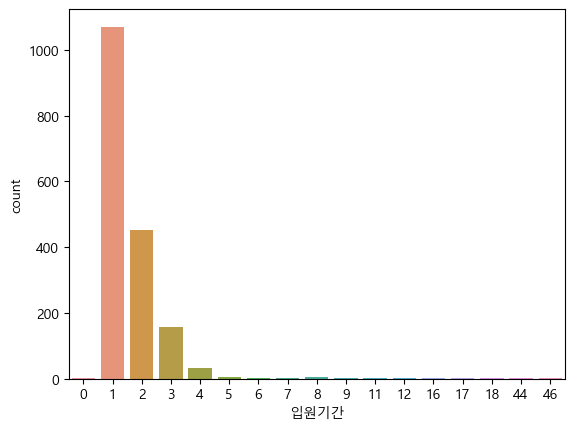

In [24]:
### 데이터 타입과 분포
## 목표 변수 : 
sns.countplot(data=df_ROS_AP_D, x='입원기간')

In [25]:
df_ROS_AP_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   당뇨여부     1744 non-null   int64  
 1   스테로이드치료  1744 non-null   int64  
 2   신부전여부    1744 non-null   int64  
 3   심혈관질환    1744 non-null   int64  
 4   암발병여부    1744 non-null   int64  
 5   신장       1744 non-null   int64  
 6   체중       1744 non-null   float64
 7   종양진행여부   1744 non-null   int64  
 8   혈전합병증여부  1744 non-null   int64  
 9   수술기법     1744 non-null   object 
 10  재발여부     1744 non-null   int64  
 11  입원기간     1744 non-null   int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 163.6+ KB


In [32]:
# object 변환 대상 : 종양진행여부, 혈전합병증여부, 재발여부
columns_to_convert = ['종양진행여부', '혈전합병증여부', '재발여부']
df_ROS_AP_D[columns_to_convert] = df_ROS_AP_D[columns_to_convert].astype(str)
df_ROS_AP_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   당뇨여부     1744 non-null   int64  
 1   스테로이드치료  1744 non-null   int64  
 2   신부전여부    1744 non-null   int64  
 3   심혈관질환    1744 non-null   int64  
 4   암발병여부    1744 non-null   int64  
 5   신장       1744 non-null   int64  
 6   체중       1744 non-null   float64
 7   종양진행여부   1744 non-null   object 
 8   혈전합병증여부  1744 non-null   object 
 9   수술기법     1744 non-null   object 
 10  재발여부     1744 non-null   object 
 11  입원기간     1744 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 163.6+ KB


In [33]:
df_ROS_AP_D_list = df_ROS_AP_D.describe().columns.to_list()
df_ROS_AP_D_list

['당뇨여부', '스테로이드치료', '신부전여부', '심혈관질환', '암발병여부', '신장', '체중', '입원기간']